# hdf文件读取
1. [CSDN python 读取 modis hdf文件](https://blog.csdn.net/good_learner_1/article/details/103728621?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522164731018516780264078165%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=164731018516780264078165&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v31_ecpm-2-103728621.142^v2^article_score_rank,143^v4^control&utm_term=python+%E8%AF%BB%E5%8F%96modis%E6%96%87%E4%BB%B6&spm=1018.2226.3001.4187)
> 出现过一次报错，新安装时numpy版本太低，更新后问题解决。
2. [pyhdf官方文档](http://fhs.github.io/pyhdf/modules/SD.html)

In [1]:
from pyhdf.SD import SD,SDC #pyhdf.SD SD: scientific dataset
import pprint 
import matplotlib.pyplot as plt

## modis 数据

In [1]:
hdf =SD('D:\study\MCD43A4.A2020001.h27v05.006.2020010215140.hdf')
print(hdf.info()) # （14， 6）代表有14个科学数据集，6的意思不知道

NameError: name 'SD' is not defined

In [9]:
data = hdf.datasets()
    
for idx,sds in enumerate(data.keys()):
	print (idx,sds)

0 BRDF_Albedo_Band_Mandatory_Quality_Band1
1 BRDF_Albedo_Band_Mandatory_Quality_Band2
2 BRDF_Albedo_Band_Mandatory_Quality_Band3
3 BRDF_Albedo_Band_Mandatory_Quality_Band4
4 BRDF_Albedo_Band_Mandatory_Quality_Band5
5 BRDF_Albedo_Band_Mandatory_Quality_Band6
6 BRDF_Albedo_Band_Mandatory_Quality_Band7
7 Nadir_Reflectance_Band1
8 Nadir_Reflectance_Band2
9 Nadir_Reflectance_Band3
10 Nadir_Reflectance_Band4
11 Nadir_Reflectance_Band5
12 Nadir_Reflectance_Band6
13 Nadir_Reflectance_Band7


In [10]:
sds_obj = hdf.select('BRDF_Albedo_Band_Mandatory_Quality_Band1')
data1 = sds_obj.get()
pprint.pprint(sds_obj.attributes())

{'Description': 'Mandatory QA:\n'
                '  0 = processed, good quality (full BRDF inversions)\n'
                '  1 = processed, see other QA (magnitude BRDF inversions)\n',
 '_FillValue': 255,
 'long_name': 'BRDF_Albedo_Band_Mandatory_Quality_Band1',
 'units': 'concatenated flags',
 'valid_range': [0, 254]}


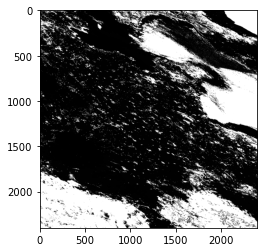

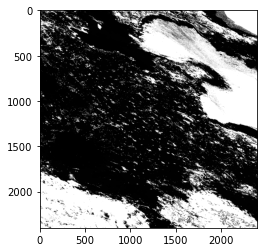

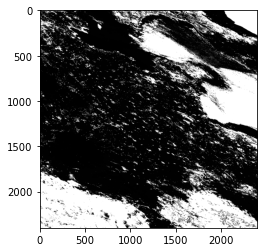

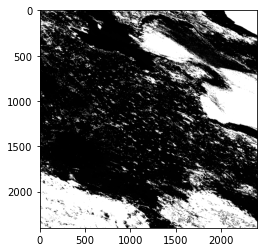

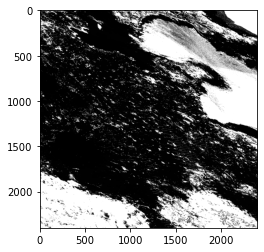

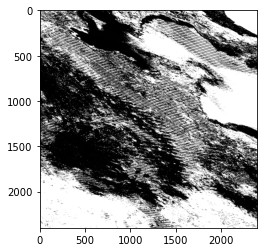

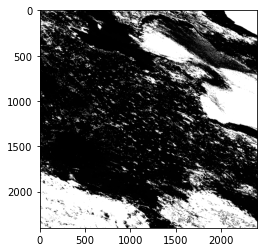

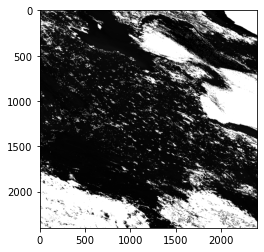

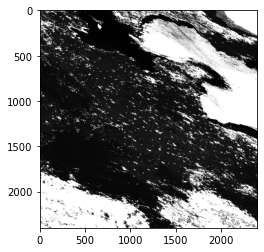

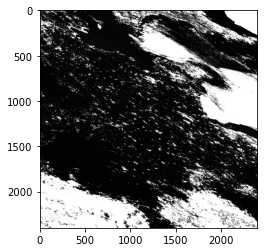

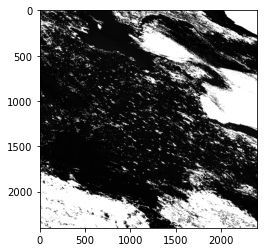

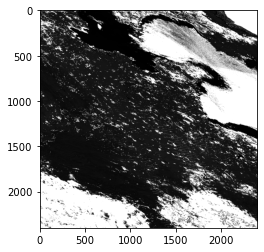

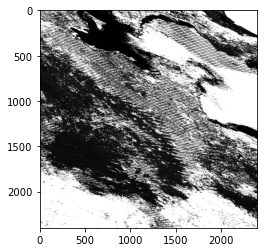

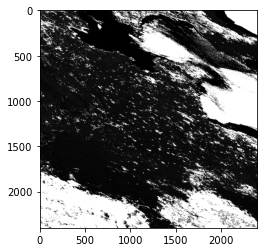

In [11]:
for i in data:
    img = hdf.select(i)[:]  # 图像数据
    plt.imshow(img, cmap='gray')  # 显示图像
    plt.show()

## GLASS AVHRR ET 数据
> 潜热通量和蒸散发[数据单位换算](https://blog.csdn.net/jerry003/article/details/119328919)

(1, 4)
0 ET
{'_FillValue': 0.0,
 'add_offset': 0.0,
 'add_offset_err': 0.0,
 'long_name': 'ET 8-day 0.05-degrees GEO Grid',
 'scale_factor': 0.0,
 'scale_factor_err': 0.0,
 'units': 'W/m2',
 'valid_range': [-100.0, 300.0]}


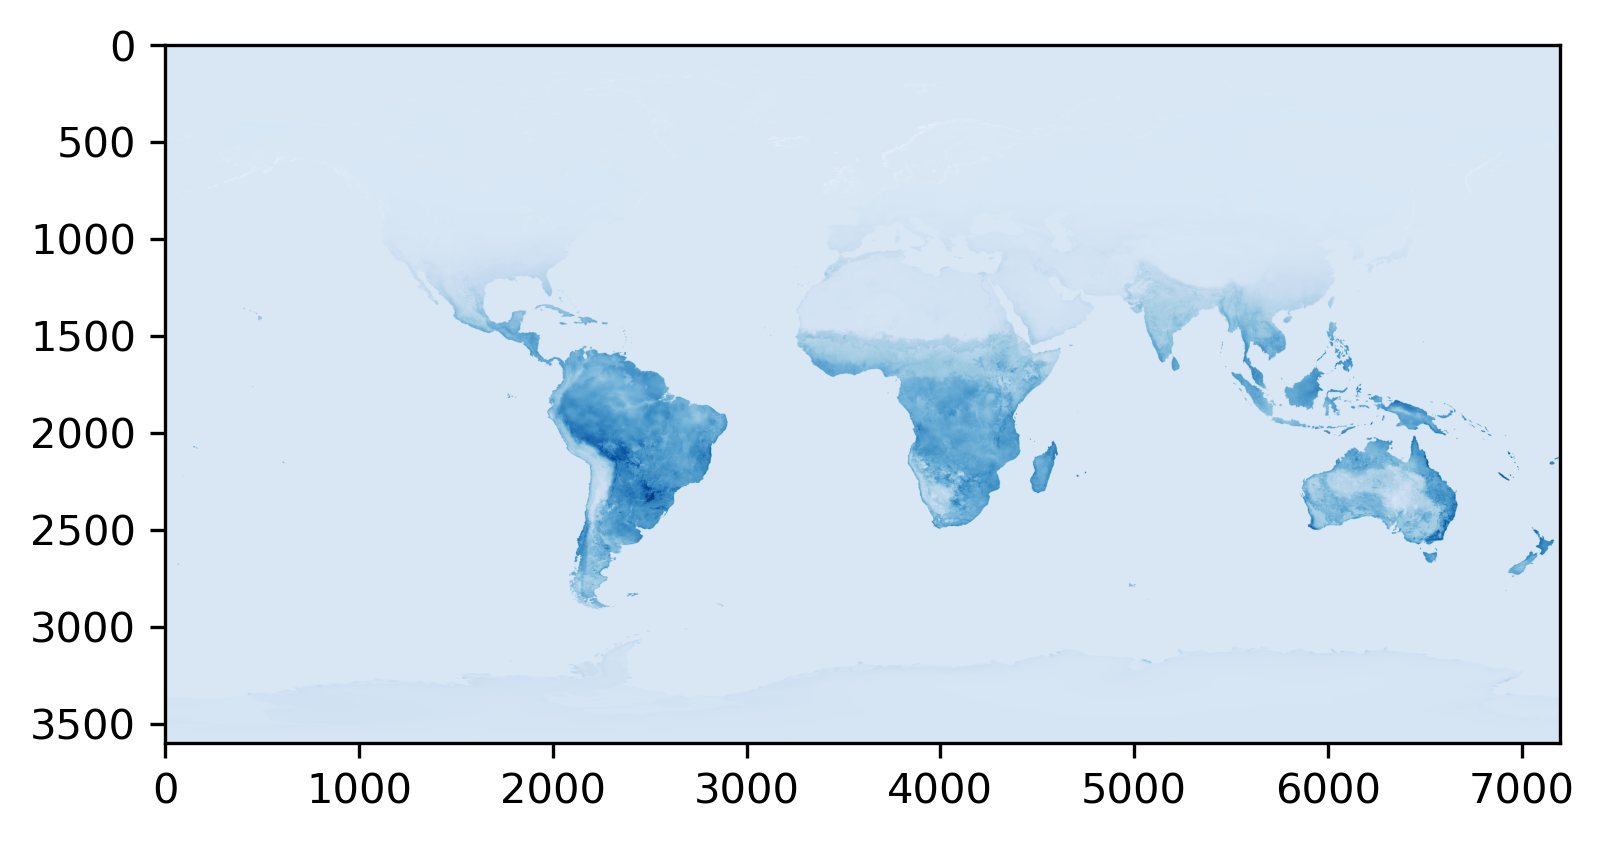

In [2]:
from pyhdf.SD import SD,SDC
import pprint 
import matplotlib.pyplot as plt

hdf = SD('E:/GLASS-ET/AVHRR/1982/GLASS11B02.V41.A1982001.2018123.hdf')
print(hdf.info())

data = hdf.datasets()
    
for idx,sds in enumerate(data.keys()):
	print (idx,sds)
    
sds_obj = hdf.select('ET')
data1 = sds_obj.get()
pprint.pprint(sds_obj.attributes())

for i in data:
    img = hdf.select(i)[:]  # 图像数据
    plt.figure(1, dpi = 300)
    plt.imshow(img, cmap='Blues')  # 显示图像
    plt.show()

## GLASS AVHRR GPP 数据

(1, 4)
0 GPP
{'_FillValue': 65535,
 'add_offset': 0.0,
 'add_offset_err': 0.0,
 'long_name': 'Gross Primary Production 8-Day Average 0.05D GEO Grid',
 'scale_factor': 0.01,
 'scale_factor_err': 0.0,
 'units': 'gC m-2 day-1',
 'valid_range': [0, 3000]}


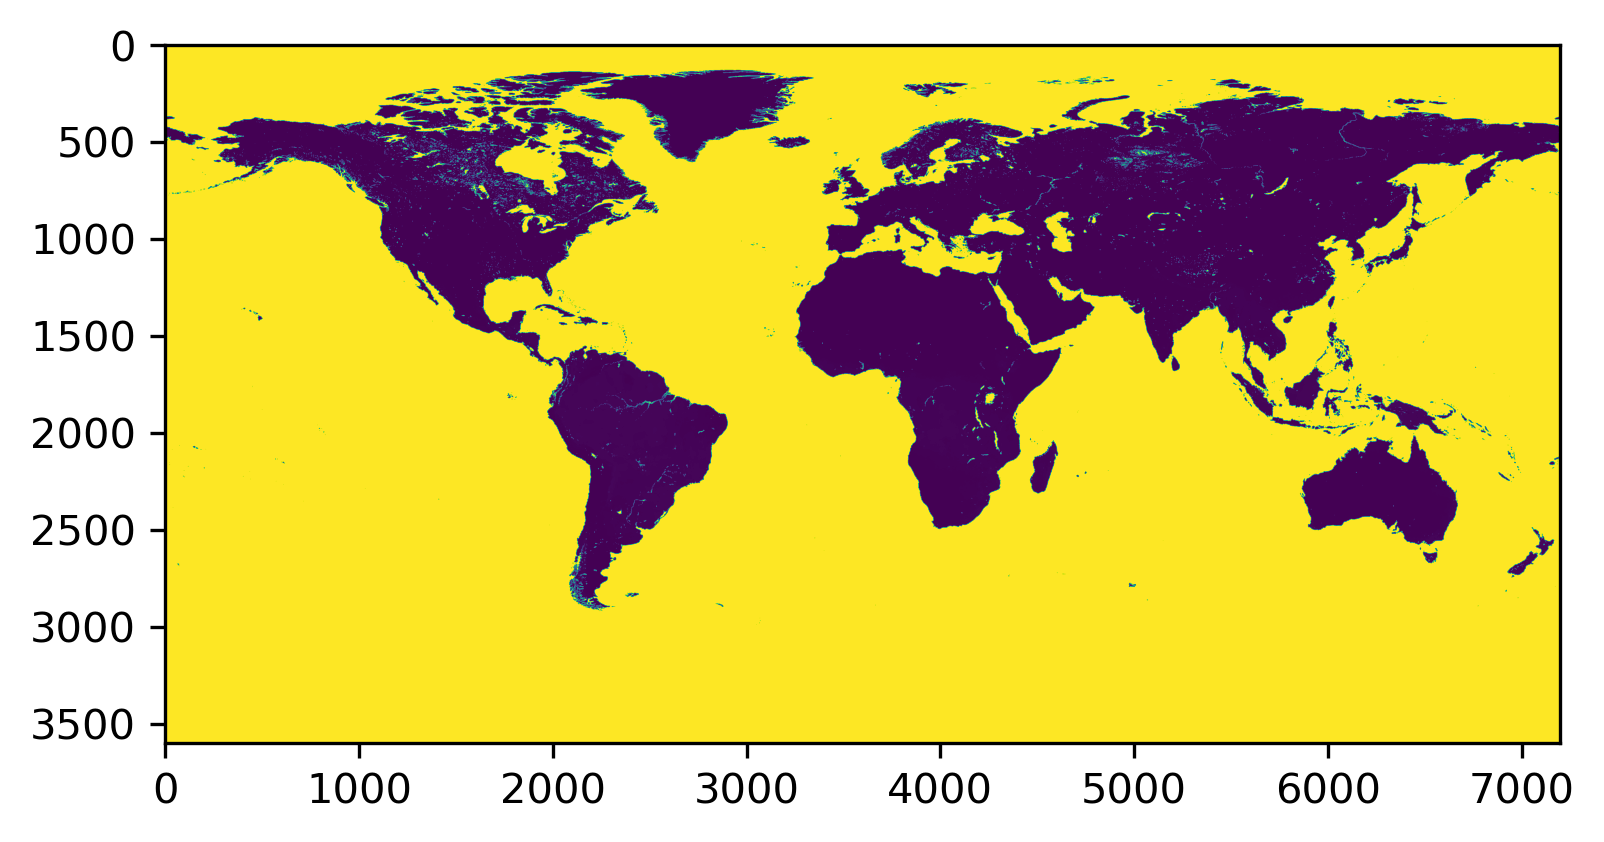

In [4]:
from pyhdf.SD import SD,SDC
import pprint 
import matplotlib.pyplot as plt

hdf = SD('E:/GLASS-GPP/AVHRR/1982/GLASS12B02.V40.A1982001.2019363.hdf')

print(hdf.info())

data = hdf.datasets()
    
for idx,sds in enumerate(data.keys()):
	print (idx,sds)

#%%
sds_obj = hdf.select('GPP')
data1 = sds_obj.get()
pprint.pprint(sds_obj.attributes())

'''
data1.dtype = 'float32'

data1[data1==65535]=np.nan
data1 = data1*0.01
'''

for i in data:
    img = hdf.select(i)[:]  # 图像数据
    plt.figure(1, dpi = 300)
    plt.imshow(img, cmap='viridis')  # 显示图像
    plt.show()